<a href="https://colab.research.google.com/github/kimdain0222/deep_learning2/blob/main/12%EC%A3%BC%EC%B0%A8(%EA%B5%90%EC%88%98ver)optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

- **Loss** function `J` 정의

In [ ]:
def loss_J(w0,w1):
    return (w0**2) + 8.0*(w1**2)

- `J`의 **gradient**(미분,기울기) 정의
> - `w0`와 `w1`에 대한 미분 결과를 각각 반환함

In [ ]:
def grad_J(w0,w1):
    return np.array([2*w0, 16*w1])

- **Loss J** 시각화

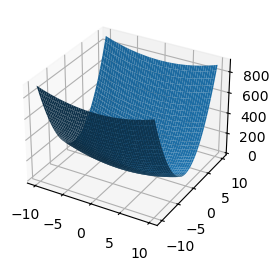

In [ ]:
plt.figure(figsize=(3,3))
plt3d = plt.axes(projection='3d')
w0_axis = np.arange(-10,10,0.1)
w1_axis = np.arange(-10,10,0.1)
w0,w1 = np.meshgrid(w0_axis,w1_axis)
loss = loss_J(w0,w1)
plt3d.plot_surface(w0,w1,loss)

- `w`의 초기값, **eta** 및 **iteration** 설정

In [ ]:
w_init = np.array([-8,4])
eta = 0.1
iter = 100

## 1. SGD

In [ ]:
def sgd(eta,w_init,iter):
    # update 과정의 w를 저장할 ndarray 초기화 (초기값 포함 총 iter+1개의 저장소)
    w = np.zeros((iter+1,2))
    w[0] = w_init
    for i in range(iter):
        w[i+1] = w[i] - eta*grad_J(w[i,0],w[i,1])
    return w

## 2. momentum

In [ ]:
def momentum(alpha,eta,w_init,iter):
    w = np.zeros((iter+1,2))
    # v의 초기값
    v = np.array([0,0])
    # w의 초기값
    w[0] = w_init
    for i in range(iter):
        # v update
        v = alpha*v - eta*grad_J(w[i,0],w[i,1])
        # w update
        w[i+1] = w[i] + v
    return w

## 3. NAG

In [ ]:
def NAG(alpha,eta,w_init,iter):
    w = np.zeros((iter+1,2))
    # v의 초기값
    v = np.array([0,0])
    # w의 초기값
    w[0] = w_init
    for i in range(iter):
        # v update
        v = alpha*v - eta*grad_J(w[i,0]+alpha*v[0],w[i,1]+alpha*v[1])
        # w update
        w[i+1] = w[i] + v
    return w

## 4. AdaGrad

In [ ]:
def AdaGrad(eta,w_init,iter):
    w = np.zeros((iter+1,2))
    w[0] = w_init
    # h의 초기값
    h = np.array([0,0])
    for i in range(iter):
        # h update
        h = h + grad_J(w[i,0],w[i,1])*grad_J(w[i,0],w[i,1])
        # w update
        # 분모가 0이 되는 것을 방지하기 위해, sqrt(h)에 아주 작은 값(ex> 0.0000001,1e-7)을 더함
        w[i+1] = w[i] - eta*(1/(np.sqrt(h)+1e-7)) * grad_J(w[i,0],w[i,1])
    return w

## 5. RMSProp

In [ ]:
def RMSProp(gamma,eta,w_init,iter):
    w = np.zeros((iter+1,2))
    w[0] = w_init
    # h의 초기값
    h = np.array([0,0])
    for i in range(iter):
        # h update
        h = gamma*h + (1-gamma)*grad_J(w[i,0],w[i,1])*grad_J(w[i,0],w[i,1])
        # w update
        # 분모가 0이 되는 것을 방지하기 위해, sqrt(h)에 아주 작은 값(ex> 0.0000001,1e-7)을 더함
        w[i+1] = w[i] - eta*(1/(np.sqrt(h)+1e-7)) * grad_J(w[i,0],w[i,1])
    return w

## 6. Adam

In [ ]:
def Adam(beta1,beta2,eta,w_init,iter):
    w = np.zeros((iter+1,2))
    w[0] = w_init
    m = np.array([0,0])
    v = np.array([0,0])
    m_h = np.array([0,0])
    v_h = np.array([0,0])
    for i in range(iter):
        m = beta1*m + (1-beta1)*grad_J(w[i,0],w[i,1])
        v = beta2*v + (1-beta2)*grad_J(w[i,0],w[i,1])*grad_J(w[i,0],w[i,1])
        m_h = m / (1-beta1**(i+1))
        v_h = v / (1-beta2**(i+1))
        w[i+1] = w[i] - eta*(1/(np.sqrt(v_h)+1e-7))*m_h
    return w

## 7. 각 optimizer에 대한 결과 확인

In [ ]:
w_sgd = sgd(eta,w_init,iter)
w_mom = momentum(0.3,eta,w_init,iter) # alpha = 0.3
w_nag = NAG(0.3,eta,w_init,iter) # alpha = 0.3
w_ag = AdaGrad(eta,w_init,iter)
w_rp = RMSProp(0.9,eta,w_init,iter) # gamma = 0.9
w_adam = Adam(0.9,0.9,eta,w_init,iter) # beta1 = beta2 = 0.9

In [ ]:
w_sgd[-1], w_mom[-1], w_nag[-1], w_ag[-1], w_rp[-1], w_adam[-1]

(array([-1.62962878e-09,  2.61327449e-22]),
 array([-1.56796468e-21, -3.72020870e-26]),
 array([-1.50050016e-15,  8.83742211e-02]),
 array([-6.22632628,  2.32354796]),
 array([-7.46563778e-02, -1.77237205e-20]),
 array([0.36861601, 0.06501994]))

## 8. 결과 시각화

- `plt.contourf(x,y,z,levels,cmap)`
> - `(x,y)`위치에 대응되는 `z` 값을 `cmap`에 따라 색상으로 시각화함
> - `levels`는 색상의 단계를 의미

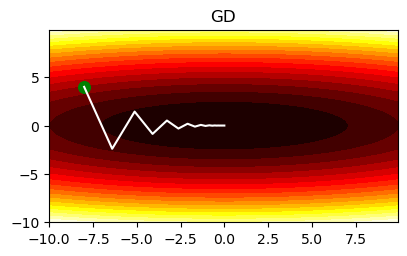

In [ ]:
plt.figure(figsize=(4.5,2.5))
plt.title('GD')
plt.contourf(w0,w1,loss,levels=20,cmap='hot')
plt.plot(w_sgd[:,0],w_sgd[:,1],color='white')
plt.scatter(w_sgd[0,0],w_sgd[0,1],color='green',s=70)

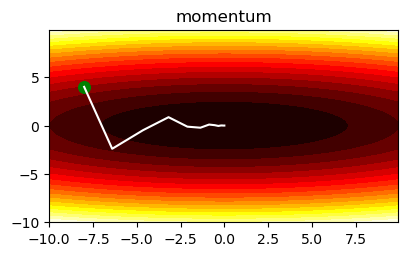

In [ ]:
plt.figure(figsize=(4.5,2.5))
plt.title('momentum')
plt.contourf(w0,w1,loss,levels=20,cmap='hot')
plt.plot(w_mom[:,0],w_mom[:,1],color='white')
plt.scatter(w_mom[0,0],w_mom[0,1],color='green',s=70)

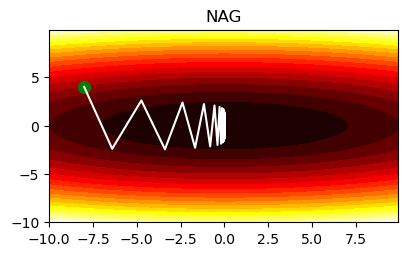

In [ ]:
plt.figure(figsize=(4.5,2.5))
plt.title('NAG')
plt.contourf(w0,w1,loss,levels=20,cmap='hot')
plt.plot(w_nag[:,0],w_nag[:,1],color='white')
plt.scatter(w_nag[0,0],w_nag[0,1],color='green',s=70)

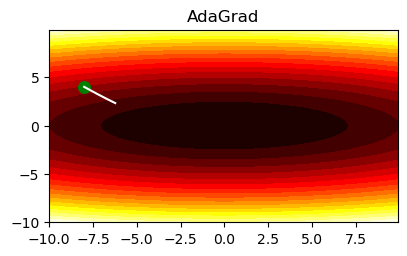

In [ ]:
plt.figure(figsize=(4.5,2.5))
plt.title('AdaGrad')
plt.contourf(w0,w1,loss,levels=20,cmap='hot')
plt.plot(w_ag[:,0],w_ag[:,1],color='white')
plt.scatter(w_ag[0,0],w_ag[0,1],color='green',s=70)

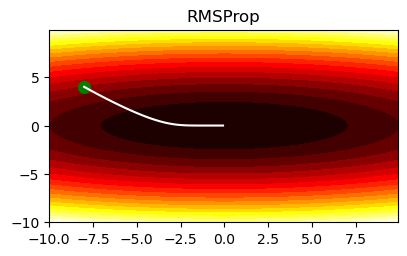

In [ ]:
plt.figure(figsize=(4.5,2.5))
plt.title('RMSProp')
plt.contourf(w0,w1,loss,levels=20,cmap='hot')
plt.plot(w_rp[:,0],w_rp[:,1],color='white')
plt.scatter(w_rp[0,0],w_rp[0,1],color='green',s=70)

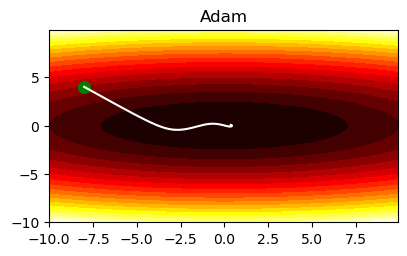

In [ ]:
plt.figure(figsize=(4.5,2.5))
plt.title('Adam')
plt.contourf(w0,w1,loss,levels=20,cmap='hot')
plt.plot(w_adam[:,0],w_adam[:,1],color='white')
plt.scatter(w_adam[0,0],w_adam[0,1],color='green',s=70)